In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator= '\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
df.duplicated().sum() 

np.int64(0)

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [8]:
# Convert Release_Date to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date']) 

# Extract the year from the Release_Date column
df['year'] = df['Release_Date'].dt.year

In [9]:
# Droping the columns 

cols = ['Overview', 'Original_Language', 'Poster_Url']

df.drop(cols, axis=1, inplace=True)

In [10]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021


**Categorizing 'Vote_Average' Column**

We would cut the 'Vote_Average' values and make 4 categories: 'popular' 'average' 'below_avg' 'not_popular' to describe it more using catigorize_col() function provided above.

In [11]:
def categorize_col(df, col_name):
    # Define bins and their corresponding category labels
    bins = [0, 4, 6, 8, 10]  # Thresholds for the categories
    labels = ['not_popular', 'below_avg', 'average', 'popular']  # Category labels
    
    # Use panda's cut method to categorize values in the column
    df[col_name] = pd.cut(df[col_name], bins=bins, labels=labels, include_lowest=True)
    return df

In [12]:
df = categorize_col(df, 'Vote_Average')
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,average,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,average,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021
...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,13.357,896,average,"Drama, Crime",1973
9823,2020-10-01,Violent Delights,13.356,8,not_popular,Horror,2020
9824,2016-05-06,The Offering,13.355,94,below_avg,"Mystery, Thriller, Horror",2016
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History",2021


In [13]:
df['Vote_Average'].value_counts()

Vote_Average
average        6603
below_avg      2705
popular         314
not_popular     205
Name: count, dtype: int64

In [14]:
df.isna().sum() # checking for the null values

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
year            0
dtype: int64

# we'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [15]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop = True)

In [16]:
# casting column into category

df['Genre'] = df['Genre'].astype('category')

# Data Visualization

In [17]:
sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Netflix ?

In [18]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

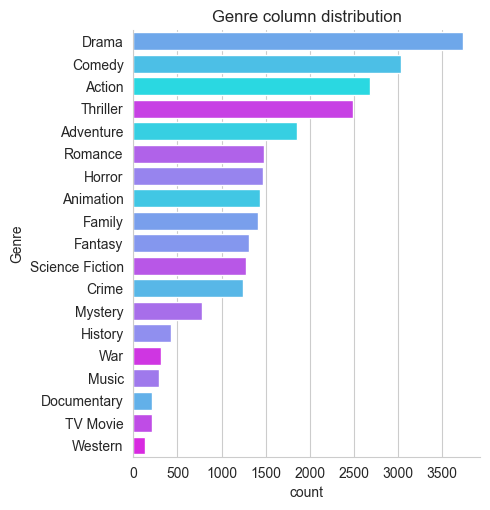

In [19]:
sns.catplot(y= 'Genre', data = df, kind = 'count', hue='Genre',
            order = df["Genre"].value_counts().index,
            palette= 'cool'
                )
plt.title("Genre column distribution")
plt.show()

# Which has highest votes in vote avg column ?

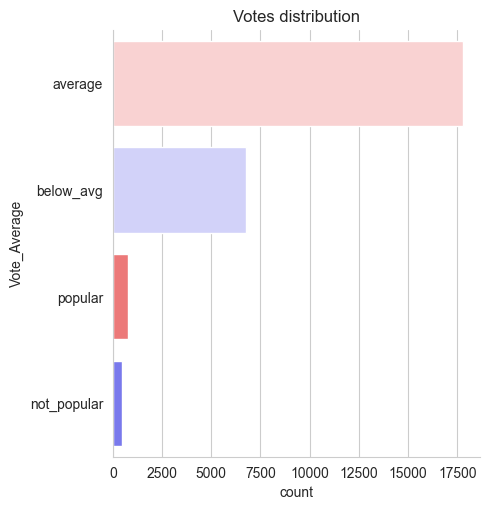

In [20]:
sns.catplot(y= 'Vote_Average', data = df, kind = 'count', hue='Vote_Average',
            order = df["Vote_Average"].value_counts().index,
            palette= 'bwr'
                )
plt.title("Votes distribution")
plt.show()

# What movie got the highest popularity ? what's its genre ?

In [21]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021


# What movie got the lowest popularity ? What's its genre ?

In [22]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,year
25787,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Music,2021
25788,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama,2021
25789,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History,2021
25790,1984-09-23,Threads,13.354,186,average,War,1984
25791,1984-09-23,Threads,13.354,186,average,Drama,1984
25792,1984-09-23,Threads,13.354,186,average,Science Fiction,1984


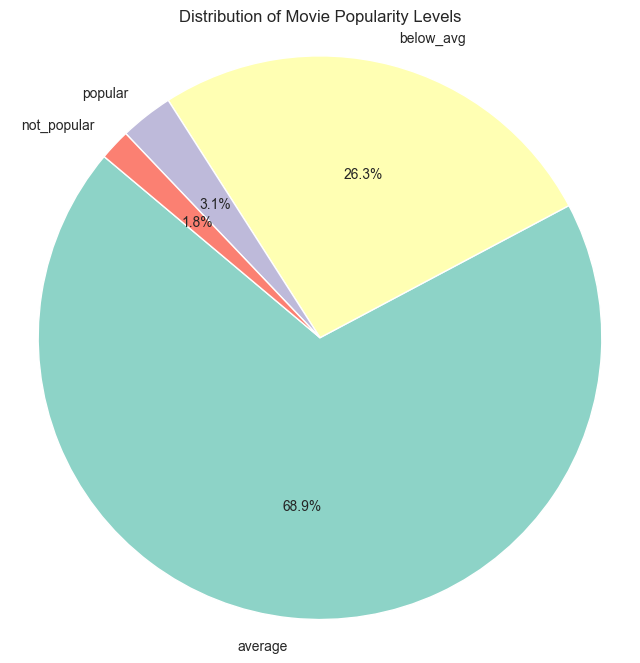

In [23]:
# Vote_Average category counts
vote_counts = df['Vote_Average'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(vote_counts, labels=vote_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Movie Popularity Levels')
plt.axis('equal')
plt.show()

# Which year has the most filmmed movies ?

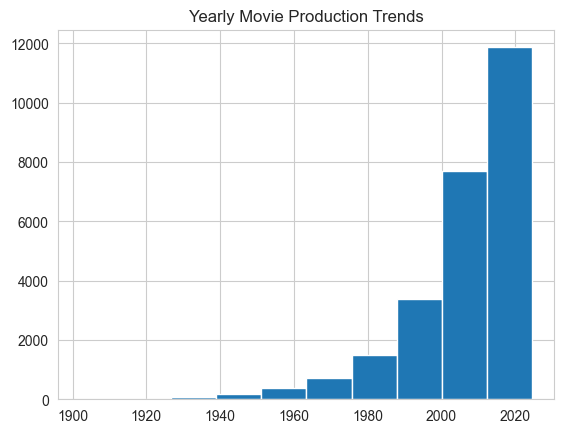

In [24]:
df["Release_Date"].hist()
plt.title("Yearly Movie Production Trends")
plt.show()

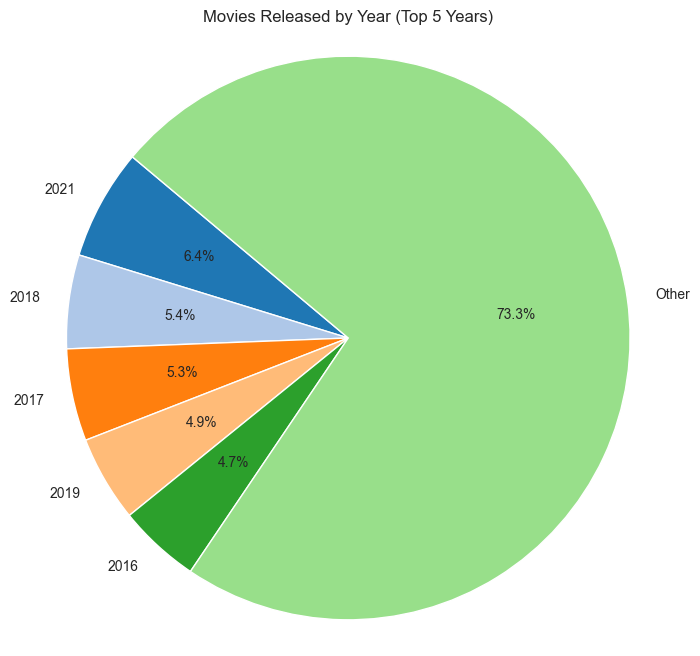

In [25]:
# Yearly movie count
year_counts = df['year'].value_counts().head(5)  # Top 5 years
other_years = df['year'].value_counts()[5:].sum()
year_counts['Other'] = other_years

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Movies Released by Year (Top 5 Years)')
plt.axis('equal')
plt.show()

**Conclusion**

Drama is the most frequent genre in the dataset, accounting for over 14% of all entries across 19 different genres.

Approximately 25.5% of the movies in the dataset (6,520 entries) are classified as popular based on audience votes. Among these, Drama once again leads, representing more than 18.5% of the popular films.

"Spider-Man: No Way Home" holds the highest popularity score in the dataset. It belongs to the genres of Action, Adventure, and Science Fiction.

The film with the lowest popularity score is "The United States vs. Billie Holiday" and "Thread", which spans multiple genres including Music, Drama, War, Science Fiction, and History.

The year 2020 saw the highest number of films produced, making it the peak year for filmmaking activity in the dataset